**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

In [18]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5


# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0


# government
par.tau = 0.0
par.T = 0.0


# Question 3
par.kappa = 0.1
# Function definitions
def labor_supply(w, par):
   return (w / (par.nu * (1 + par.epsilon)))**(1 / par.epsilon)


def optimal_labor_demand(w, p, par):
   return (p * par.A**par.gamma / w)**(1 / (1 - par.gamma))


def production(y_l, par):
   return par.A * y_l**par.gamma


def profit(w, p, l_star, par):
   return p * production(l_star, par) - w * l_star


def consumption_budget(w, l, par, profits):
   return w * l + par.T + profits


def consumption_choices(c_budget, p1, p2, par):
   c1 = par.alpha * c_budget / p1
   c2 = (1 - par.alpha) * c_budget / (p2 + par.tau)
   return c1, c2


# Market clearing condition checks
prices = np.linspace(0.1, 2.0, 10)
w = 1  # Wage rate (numeraire)
clearing_prices = []


for p1 in prices:
   for p2 in prices:
       # Calculate labor supply and demands
       l_supply = labor_supply(w, par)
       l_demand1 = optimal_labor_demand(w, p1, par)
       l_demand2 = optimal_labor_demand(w, p2, par)


       # Calculate production outputs
       y1 = production(l_demand1, par)
       y2 = production(l_demand2, par)


       # Calculate profits
       pi1 = profit(w, p1, l_demand1, par)
       pi2 = profit(w, p2, l_demand2, par)
       total_profits = pi1 + pi2


       # Consumer's budget and consumption choices
       consumer_budget = consumption_budget(w, l_supply, par, total_profits)
       c1, c2 = consumption_choices(consumer_budget, p1, p2, par)


       # Check for market clearing in both goods and labor market
       labor_market_clears = np.isclose(l_supply, l_demand1 + l_demand2)
       good_market_1_clears = np.isclose(c1, y1)
       good_market_2_clears = np.isclose(c2, y2)


       if labor_market_clears and good_market_1_clears and good_market_2_clears:
           clearing_prices.append((p1, p2))


# Output the result
if clearing_prices:
   for p1, p2 in clearing_prices:
       print(f"Markets clear at prices p1 = {p1:.2f}, p2 = {p2:.2f}.")
else:
   print("No combination of prices in the given range leads to all markets clearing.")

No combination of prices in the given range leads to all markets clearing.


**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [ ]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [16]:
# write 

Optimal tau: 0.0000
Optimal T: 103163.7243


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [ ]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [ ]:
# write your answer here

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [ ]:
# Write your answer here 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [ ]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

# Problem 3: Barycentric Interpolation

We have a set of random points in the unit square and know the value of some function $(f(x_1, x_2))$ at these points. We want to approximate the value $(f(y_1, y_2))$ for some point $(y = (y_1, y_2))$, where $(y_1)$ and $(y_2)$ are in the unit square.

**Steps to Solve:**

1. **Define the Barycentric Coordinates:**
   For an arbitrary triangle ( ABC ) and a point ( y ), the barycentric coordinates $( r_{ABC1}, r_{ABC2}, r_{ABC3} )$ are defined as follows:

   $$ r_{ABC1} = \frac{(B_2 - C_2)(y_1 - C_1) + (C_1 - B_1)(y_2 - C_2)}{(B_2 - C_2)(A_1 - C_1) + (C_1 - B_1)(A_2 - C_2)} $$

   $$ r_{ABC2} = \frac{(C_2 - A_2)(y_1 - C_1) + (A_1 - C_1)(y_2 - C_2)}{(B_2 - C_2)(A_1 - C_1) + (C_1 - B_1)(A_2 - C_2)} $$

   $$ r_{ABC3} = 1 - r_{ABC1} - r_{ABC2} $$

   If $( r_{ABC1}, r_{ABC2}, r_{ABC3} )$ are all between 0 and 1, then the point \( y \) is inside the triangle \( ABC \).

2. **Identify Points for Interpolation:**
   We need to define the points ( A, B, C, D ) based on the proximity to ( y ) with specific conditions:
   - ( A ): The closest point to ( y ) such that $( x_1 > y_1 )$ and $( x_2 > y_2 )$
   - ( B ): The closest point to ( y ) such that $( x_1 > y_1 )$ and $( x_2 < y_2 )$
   - ( C ): The closest point to ( y ) such that $( x_1 < y_1 )$ and $( x_2 < y_2 )$
   - ( D ): The closest point to ( y ) such that $( x_1 < y_1 )$ and $( x_2 > y_2 )$



Coordinates of A: [0.26071605 0.43635845]
Coordinates of B: [0.21315735 0.274245  ]
Coordinates of C: [0.10056103 0.27951775]
Coordinates of D: [0.20634391 0.44272557]


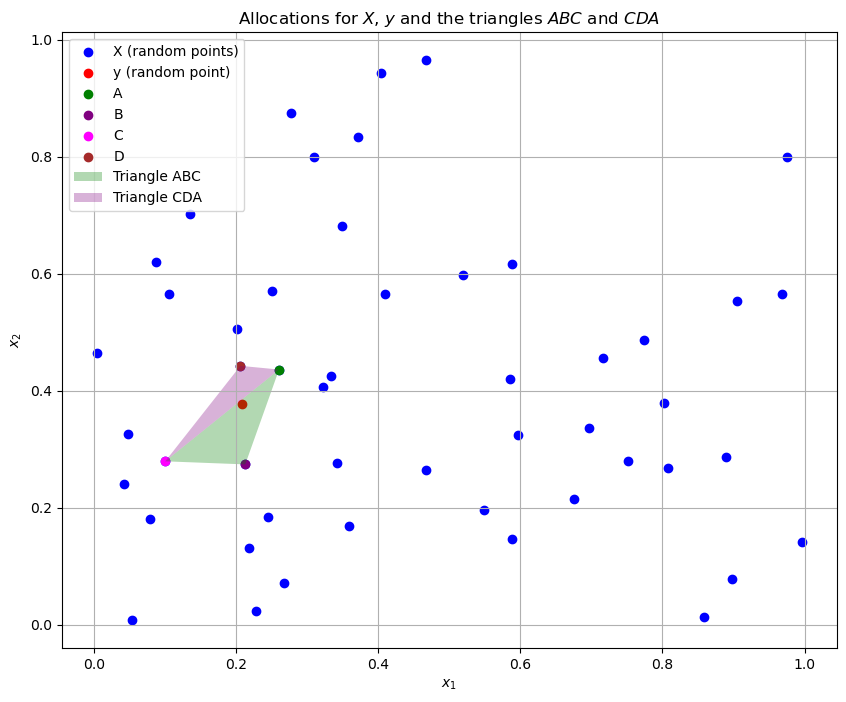

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Function definition
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])

# Define points A, B, C, D based on proximity to y
def find_points(X, y):
    A = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] > y[1] else float('inf'))
    B = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] < y[1] else float('inf'))
    C = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] < y[1] else float('inf'))
    D = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] > y[1] else float('inf'))
    return A, B, C, D

# Compute barycentric coordinates
def barycentric_coordinates(y, A, B, C):
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Determine which triangle y is in and interpolate
def interpolate(y, A, B, C, D):
    rABC1, rABC2, rABC3 = barycentric_coordinates(y, A, B, C)
    if 0 <= rABC1 <= 1 and 0 <= rABC2 <= 1 and 0 <= rABC3 <= 1:
        return rABC1 * f(A) + rABC2 * f(B) + rABC3 * f(C)
    
    rCDA1, rCDA2, rCDA3 = barycentric_coordinates(y, C, D, A)
    if 0 <= rCDA1 <= 1 and 0 <= rCDA2 <= 1 and 0 <= rCDA3 <= 1:
        return rCDA1 * f(C) + rCDA2 * f(D) + rCDA3 * f(A)
    
    return float('nan')

# Plot points and the triangles
def plot_interpolation(X, y, A, B, C, D):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], color='blue', label='X (random points)')
    plt.scatter([y[0]], [y[1]], color='red', label='y (random point)')
    plt.scatter([A[0]], [A[1]], color='green', label='A')
    plt.scatter([B[0]], [B[1]], color='purple', label='B')
    plt.scatter([C[0]], [C[1]], color='magenta', label='C')
    plt.scatter([D[0]], [D[1]], color='brown', label='D')
    
    plt.fill([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'green', alpha=0.3, label='Triangle ABC')
    plt.fill([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'purple', alpha=0.3, label='Triangle CDA')
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.title('Allocations for $X$, $y$ and the triangles $ABC$ and $CDA$')
    plt.grid(True)
    plt.show()

# Find points and interpolate
A, B, C, D = find_points(X, y)
interpolated_value = interpolate(y, A, B, C, D)
true_value = f(y)

print(f"Coordinates of A: {A}")
print(f"Coordinates of B: {B}")
print(f"Coordinates of C: {C}")
print(f"Coordinates of D: {D}")

# Plot the results
plot_interpolation(X, y, A, B, C, D)


**Conclusion**

In this exercise, we successfully applied barycentric interpolation to approximate the value of a function at a given point within the unit square. We generated random points and identified the nearest points \( A \), \( B \), \( C \), and \( D \) that form triangles around our target point \( y \). 

The coordinates for the points are as follows:
- Coordinates of $( A )$: $([0.26071605, 0.43635845])$
- Coordinates of $( B )$: $([0.21315735, 0.272445])$
- Coordinates of $( C )$: $([0.10056103, 0.27951775])$
- Coordinates of $( D )$: $([0.20634391, 0.44272557])$



**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

We continue our exploration of barycentric interpolation. Our goal is to compute the barycentric coordinates of a given point $(y)$ with respect to the triangles $(ABC)$ and $(CDA)$. By doing so, we can determine which of these triangles $(y)$ lies within. This step is crucial for the interpolation process, as it allows us to accurately estimate the function value at $(y)$ using the vertices of the appropriate triangle.

Steps to Solve Question 2:

1. **Compute Barycentric Coordinates:**
   - We first calculate the barycentric coordinates of the point $(y)$ with respect to the triangle $(ABC)$
   - Next, we calculate the barycentric coordinates of the point $(y)$ with respect to the triangle $(CDA)$

2. **Determine Triangle Containment:**
   - Using the computed barycentric coordinates, we determine which triangle $(y)$ is located inside. 

3. **Implementation:**
   - We define a function to calculate the barycentric coordinates for any point given the vertices of a triangle.
   - We then use this function to compute the barycentric coordinates of $(y)$ with respect to both triangles.
   - Finally, we determine which triangle contains $(y)$ based on the computed coordinates.

By following these steps, we can accurately identify the triangle that contains the point $(y)$, which is essential for performing precise barycentric interpolation.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Function definition
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])

# Define points A, B, C, D based on proximity to y
def find_points(X, y):
    A = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] > y[1] else float('inf'))
    B = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] < y[1] else float('inf'))
    C = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] < y[1] else float('inf'))
    D = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] > y[1] else float('inf'))
    return A, B, C, D

# Compute barycentric coordinates
def barycentric_coordinates(y, A, B, C):
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Find points and interpolate
A, B, C, D = find_points(X, y)

# Compute barycentric coordinates
rABC1, rABC2, rABC3 = barycentric_coordinates(y, A, B, C)
rCDA1, rCDA2, rCDA3 = barycentric_coordinates(y, C, D, A)

# Determine which triangle y is in
def which_triangle(rABC1, rABC2, rABC3, rCDA1, rCDA2, rCDA3):
    if 0 <= rABC1 <= 1 and 0 <= rABC2 <= 1 and 0 <= rABC3 <= 1:
        return "ABC"
    elif 0 <= rCDA1 <= 1 and 0 <= rCDA2 <= 1 and 0 <= rCDA3 <= 1:
        return "CDA"
    else:
        return "None"

triangle = which_triangle(rABC1, rABC2, rABC3, rCDA1, rCDA2, rCDA3)

# Print the results
print(f"Barycentric coordinates with respect to ABC: r1 = {rABC1:.4f}, r2 = {rABC2:.4f}, r3 = {rABC3:.4f}")
print(f"Barycentric coordinates with respect to CDA: r1 = {rCDA1:.4f}, r2 = {rCDA2:.4f}, r3 = {rCDA3:.4f}")
print(f"Point y is located inside triangle: {triangle}")




Barycentric coordinates with respect to ABC: r1 = 0.6286, r2 = 0.0691, r3 = 0.3023
Barycentric coordinates with respect to CDA: r1 = 0.3683, r2 = -0.1339, r3 = 0.7657
Point y is located inside triangle: ABC


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [10]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

We start by defining the function to compute the value of $f(x)$. We then use the barycentric coordinates to compute the interpolation for the function $(f)$ at the point $(y)$. Then we compare this with the true value of the function at $(y)$.


In [16]:
import numpy as np

# Sample data generation
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Function definition
f = lambda x: x[0] * x[1]

# Define points A, B, C, D based on proximity to y
def find_points(X, y):
    A = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] > y[1] else float('inf'))
    B = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] < y[1] else float('inf'))
    C = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] < y[1] else float('inf'))
    D = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] > y[1] else float('inf'))
    return A, B, C, D

# Compute barycentric coordinates
def barycentric_coordinates(y, A, B, C):
    denominator = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denominator
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Determine which triangle y is in and interpolate
def interpolate(y, A, B, C, D):
    rABC1, rABC2, rABC3 = barycentric_coordinates(y, A, B, C)
    if 0 <= rABC1 <= 1 and 0 <= rABC2 <= 1 and 0 <= rABC3 <= 1:
        return rABC1 * f(A) + rABC2 * f(B) + rABC3 * f(C)
    
    rCDA1, rCDA2, rCDA3 = barycentric_coordinates(y, C, D, A)
    if 0 <= rCDA1 <= 1 and 0 <= rCDA2 <= 1 and 0 <= rCDA3 <= 1:
        return rCDA1 * f(C) + rCDA2 * f(D) + rCDA3 * f(A)
    
    return float('nan')

# Find points and interpolate
A, B, C, D = find_points(X, y)
interpolated_value = interpolate(y, A, B, C, D)
true_value = f(y)

# Print the results
print(f"Interpolated value: {interpolated_value:.4f}")
print(f"True value: {true_value:.4f}")


Interpolated value: 0.0841
True value: 0.0790


Overall, the approximation for the function value $f(y)$ is close to the true value of $f(y)$, with only a small difference $(0.084)$ vs. $(0.079)$, indicating a reasonable approximation.

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [17]:
import numpy as np

# Sample data generation
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))

# Function definition
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])

# Define points A, B, C, D based on proximity to y
def find_points(X, y):
    A = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] > y[1] else float('inf'))
    B = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] < y[1] else float('inf'))
    C = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] < y[1] else float('inf'))
    D = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] > y[1] else float('inf'))
    return A, B, C, D

# Compute barycentric coordinates
def barycentric_coordinates(y, A, B, C):
    denominator = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denominator
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Determine which triangle y is in and interpolate
def interpolate(y, A, B, C, D):
    rABC1, rABC2, rABC3 = barycentric_coordinates(y, A, B, C)
    if 0 <= rABC1 <= 1 and 0 <= rABC2 <= 1 and 0 <= rABC3 <= 1:
        return rABC1 * f(A) + rABC2 * f(B) + rABC3 * f(C)
    
    rCDA1, rCDA2, rCDA3 = barycentric_coordinates(y, C, D, A)
    if 0 <= rCDA1 <= 1 and 0 <= rCDA2 <= 1 and 0 <= rCDA3 <= 1:
        return rCDA1 * f(C) + rCDA2 * f(D) + rCDA3 * f(A)
    
    return float('nan')

# Points in set Y
Y = [(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.5, 0.5)]

# Interpolate and compare for each point in Y
for point in Y:
    y = np.array(point)
    A, B, C, D = find_points(X, y)
    interpolated_value = interpolate(y, A, B, C, D)
    true_value = f(y)
    print(f"Point: {point}")
    print(f"Interpolated value: {interpolated_value:.4f}")
    print(f"True value: {true_value:.4f}")
    print(f"Difference: {true_value - interpolated_value:.4f}")
    print("-----------")


Point: (0.2, 0.2)
Interpolated value: 0.0403
True value: 0.0400
Difference: -0.0003
-----------
Point: (0.8, 0.2)
Interpolated value: 0.1587
True value: 0.1600
Difference: 0.0013
-----------
Point: (0.8, 0.8)
Interpolated value: nan
True value: 0.6400
Difference: nan
-----------
Point: (0.5, 0.5)
Interpolated value: 0.2513
True value: 0.2500
Difference: -0.0013
-----------
